<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

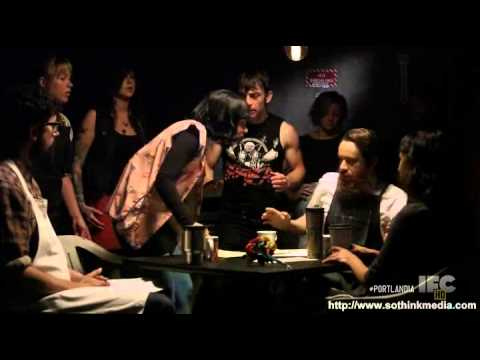

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/Users/maggie/Documents/Unit-4/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [4]:
shops.isnull().sum()

coffee_shop_name    0
full_review_text    0
star_rating         0
dtype: int64

In [5]:
# create a column for dates:

# create column with date:
shops['date_of_review'] = shops['full_review_text'].str[:11]
    
# remove date from full_review_text:
shops['full_review_text'] = shops['full_review_text'].str[11:]

# remove leading white space:
shops['full_review_text'] = shops['full_review_text'].str.strip()

In [6]:
# remove 'star rating' from star_rating column:
shops['star_rating'] = shops['star_rating'].str.replace('star rating', '')

In [7]:
shops.dtypes

coffee_shop_name    object
full_review_text    object
star_rating         object
date_of_review      object
dtype: object

In [8]:
# change star_rating to float
shops[['star_rating']] = shops[['star_rating']].apply(pd.to_numeric)
shops.dtypes

coffee_shop_name     object
full_review_text     object
star_rating         float64
date_of_review       object
dtype: object

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

### Imports

In [9]:
"""
Import Statements
"""

# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

In [10]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [11]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

### Overall word/token count:

In [12]:
# Tokenizer Pipe

tokens_overall = []

"""Create tokens"""
for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens_overall.append(doc_tokens)
shops['tokens'] = tokens_overall

In [13]:
shops['tokens'].head()

0    [1, check-in, Love, love, loved, the, atmosphe...
1    [Listed, in, Date, Night:, Austin,, Ambiance, ...
2    [1, check-in, Listed, in, Brunch, Spots, I, lo...
3    [Very, cool, decor!, Good, drinks, Nice, seati...
4    [1, check-in, They, are, located, within, the,...
Name: tokens, dtype: object

In [14]:
wc_overall = count(shops['tokens'])
wc_overall.head(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
17,the,6520,27779,1.0,0.035025,0.035025,0.856092
11,and,6804,25748,2.0,0.032464,0.067489,0.893382
22,a,6181,22084,3.0,0.027844,0.095333,0.811581
58,I,5447,19641,4.0,0.024764,0.120097,0.715205
47,to,5631,16904,5.0,0.021313,0.141411,0.739364
55,,4343,14990,6.0,0.018900,0.160311,0.570247
12,of,5087,12495,7.0,0.015754,0.176065,0.667936
97,is,4955,11749,8.0,0.014814,0.190878,0.650604
13,was,3743,9539,9.0,0.012027,0.202905,0.491465
100,in,4429,8901,10.0,0.011223,0.214128,0.581539


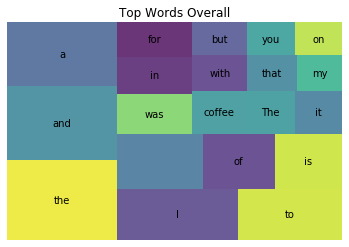

In [15]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc_overall[wc_overall['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.title('Top Words Overall')
plt.show()

### Using Stop Words:

In [62]:
STOP_WORDS = nlp.Defaults.stop_words.union(['I', 'i', ' ', 'coffee', 'Coffee','shop', 
                                            'Shop', '.', ',', '-', 'austin', 'Austin',
                                            '1', 'place', 'get'])

In [63]:
tokens = []

for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
shops['tokens'] = tokens

In [64]:
shops['tokens'].head()

0    [check-in, love, love, loved, atmosphere!, cor...
1    [listed, date, night:, austin,, ambiance, beau...
2    [check-in, listed, brunch, spots, loved, eclec...
3    [cool, decor!, good, drinks, nice, seating, ho...
4    [check-in, located, northcross, mall, shopping...
Name: tokens, dtype: object

In [65]:
wc_overall = count(shops['tokens'])
wc_overall.head(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
113,great,2407,3206,1.0,0.008510,0.008510,0.316045
275,it's,2056,3106,2.0,0.008244,0.016754,0.269958
173,like,2034,2902,3.0,0.007703,0.024457,0.267069
180,good,2073,2764,4.0,0.007336,0.031793,0.272190
16,check-in,1957,1961,5.0,0.005205,0.036998,0.256959
8,love,1428,1799,6.0,0.004775,0.041773,0.187500
334,i'm,1378,1786,7.0,0.004741,0.046514,0.180935
789,little,1230,1479,8.0,0.003926,0.050440,0.161502
345,i've,1148,1455,9.0,0.003862,0.054302,0.150735
304,don't,1130,1391,10.0,0.003692,0.057994,0.148372


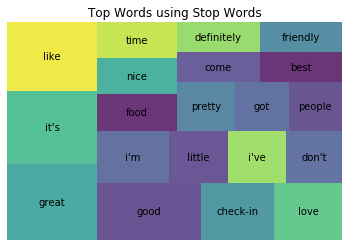

In [66]:
wc = count(shops['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.title('Top Words using Stop Words')
plt.show()

### Using Lemmatization:

In [67]:
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.text.lower() not in STOP_WORDS) and (token.is_punct == False)) and (token.pos_!= 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [68]:
shops['lemmas'] = shops['full_review_text'].apply(get_lemmas)

In [69]:
shops['lemmas'].head()

0    [check, love, love, love, atmosphere, corner, ...
1    [list, Date, Night, Ambiance, beautiful, love,...
2    [check, list, Brunch, Spots, love, eclectic, h...
3    [cool, decor, good, drink, nice, seating, over...
4    [check, locate, Northcross, mall, shopping, ce...
Name: lemmas, dtype: object

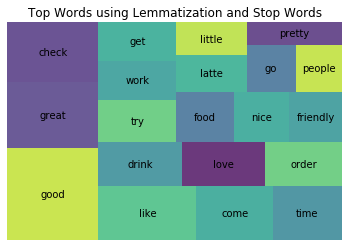

In [70]:
wc = count(shops['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.title('Top Words using Lemmatization and Stop Words')
plt.show()

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [71]:
# good shops have a rating of 4 or 5:
good_shops = count(shops[shops['star_rating'] > 3]['lemmas'])
good_shops.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
200,good,2929,4370,1.0,0.016473,0.016473,0.477036
100,great,2470,3418,2.0,0.012884,0.029358,0.402280
35,check,2686,2941,3.0,0.011086,0.040444,0.437459
190,like,1677,2434,4.0,0.009175,0.049619,0.273127
12,love,1584,2077,5.0,0.007829,0.057449,0.257980


In [72]:
# bad shops have a rating of 1, 2, or 3:
bad_shops = count(shops[shops['star_rating'] <= 3]['lemmas'])
bad_shops.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
31,good,643,993,1.0,0.013226,0.013226,0.435637
21,like,595,944,2.0,0.012573,0.025799,0.403117
84,order,431,764,3.0,0.010176,0.035974,0.292005
124,come,452,651,4.0,0.008671,0.044645,0.306233
22,drink,363,610,5.0,0.008125,0.052770,0.245935


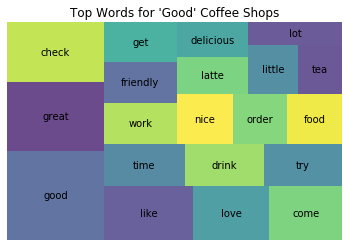

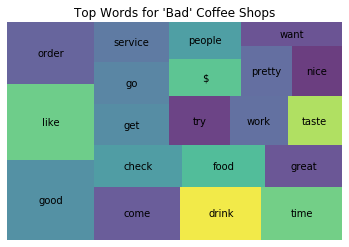

In [73]:
#visualize:
wc_top20_good = good_shops[good_shops['rank'] <= 20]

squarify.plot(sizes=wc_top20_good['pct_total'], label=wc_top20_good['word'], alpha=.8 )
plt.axis('off')
plt.title("Top Words for 'Good' Coffee Shops")
plt.show()


wc_top20_bad = bad_shops[bad_shops['rank'] <= 20]

squarify.plot(sizes=wc_top20_bad['pct_total'], label=wc_top20_bad['word'], alpha=.8 )
plt.axis('off')
plt.title("Top Words for 'Bad' Coffee Shops")
plt.show()

There appears to be a lot of similar words used to describe the 'good' and 'bad' coffee shops per the word maps. However, differences in the highly rated shops are more powerful words like "friendly", "delicious", and "love" that are used to describe people's experiences in a positive light. It would be a reasonable assumption in the case of the lower rated shops that words like "service", "taste", and "$" may have a negative connotation about their customer service, quality of products, and a higher price point. 

### 10 words with greatest difference between good and bad:

In [74]:
# Not sure how to do this one

### Look at words by individual ratings:

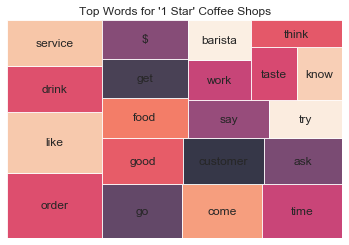

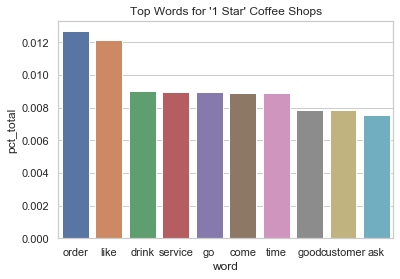

In [95]:
one_star = count(shops[shops['star_rating'] == 1]['lemmas'])

wc_top20_one_star = one_star[one_star['rank'] <= 20]

squarify.plot(sizes=wc_top20_one_star['pct_total'], label=wc_top20_one_star['word'], alpha=.8 )
plt.axis('off')
plt.title("Top Words for '1 Star' Coffee Shops")
plt.show()

sns.set(style='whitegrid')
ax = sns.barplot(x='word', y='pct_total', data=one_star[:10])
plt.title("Top Words for '1 Star' Coffee Shops")
plt.show()

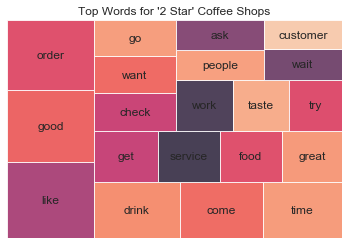

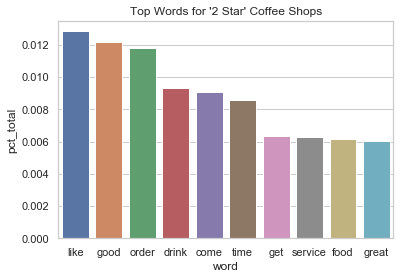

In [94]:
two_star = count(shops[shops['star_rating'] == 2]['lemmas'])

wc_top20_two_star = two_star[two_star['rank'] <= 20]

squarify.plot(sizes=wc_top20_two_star['pct_total'], label=wc_top20_two_star['word'], alpha=.8 )
plt.axis('off')
plt.title("Top Words for '2 Star' Coffee Shops")
plt.show()

sns.set(style='whitegrid')
ax = sns.barplot(x='word', y='pct_total', data=two_star[:10])
plt.title("Top Words for '2 Star' Coffee Shops")
plt.show()

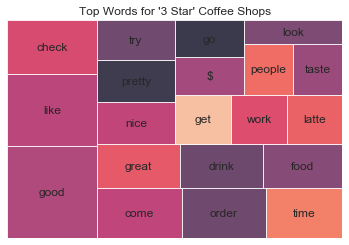

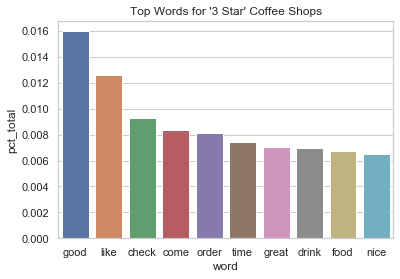

In [93]:
three_star = count(shops[shops['star_rating'] == 3]['lemmas'])

wc_top20_three_star = three_star[three_star['rank'] <= 20]

squarify.plot(sizes=wc_top20_three_star['pct_total'], label=wc_top20_three_star['word'], alpha=.8 )
plt.axis('off')
plt.title("Top Words for '3 Star' Coffee Shops")
plt.show()

sns.set(style='whitegrid')
ax = sns.barplot(x='word', y='pct_total', data=three_star[:10])
plt.title("Top Words for '3 Star' Coffee Shops")
plt.show()

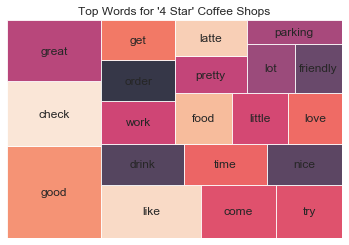

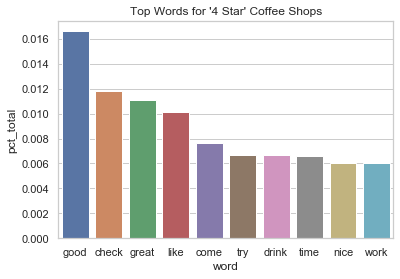

In [92]:
four_star = count(shops[shops['star_rating'] == 4]['lemmas'])

wc_top20_four_star = four_star[four_star['rank'] <= 20]

squarify.plot(sizes=wc_top20_four_star['pct_total'], label=wc_top20_four_star['word'], alpha=.8 )
plt.axis('off')
plt.title("Top Words for '4 Star' Coffee Shops")
plt.show()

sns.set(style='whitegrid')
ax = sns.barplot(x='word', y='pct_total', data=four_star[:10])
plt.title("Top Words for '4 Star' Coffee Shops")
plt.show()

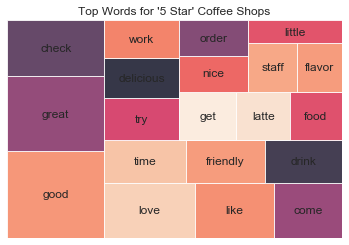

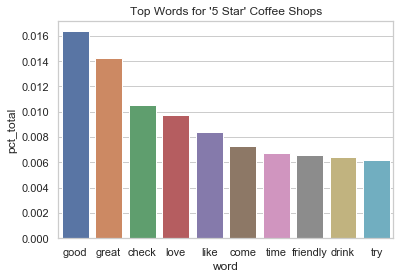

In [91]:
five_star = count(shops[shops['star_rating'] == 5]['lemmas'])

wc_top20_five_star = five_star[five_star['rank'] <= 20]

squarify.plot(sizes=wc_top20_five_star['pct_total'], label=wc_top20_five_star['word'], alpha=.8 )
plt.axis('off')
plt.title("Top Words for '5 Star' Coffee Shops")
plt.show()

five_star.head()
sns.set(style='whitegrid')
ax = sns.barplot(x='word', y='pct_total', data=five_star[:10])
plt.title("Top Words for '5 Star' Coffee Shops")
plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

